# OBJECTIVE-> TO PREDICT THE STOCK PRICES FOR LOCKHEED MARTIN USING HISTORICAL DATA  USING VARIOUS MACHINE LEARNING MODELS AND SELECTING THE BEST PERFORMING MODEL FOR THE CHOOSEN DATASET

In [265]:
# IMPORTING ALL NECESSARY PACKAGES USED IN THE ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import seaborn as sns

In [266]:
# READING THE DOWNLOADED FILE (FROM_YAHOO_FINANCE) 
LMT_Stock_Data = pd.read_csv('/Users/maverick.shivaya/Downloads/LMT.csv')

In [267]:
# VIEWING THE FIRST FEW LINES OF THE DATASET
print(LMT_Stock_Data.head())

         Date       Open       High        Low      Close  Adj Close   Volume
0  2010-09-21  70.580002  72.059998  70.510002  71.650002  47.573433  3115300
1  2010-09-22  71.349998  72.300003  71.209999  71.800003  47.673035  2687000
2  2010-09-23  71.389999  72.160004  71.199997  71.669998  47.586708  2329400
3  2010-09-24  71.709999  73.190002  71.309998  73.129997  48.556110  2708000
4  2010-09-27  73.239998  73.449997  72.360001  72.379997  48.058128  2355800


In [268]:
# VIEWING THE SPREAD AND DESCRIPTION OF THE DATASET
LMT_Stock_Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,258.944425,261.163735,256.731192,258.961495,228.331233,1.616289e+06
std,126.268056,127.505168,125.006437,126.220471,128.926018,1.063572e+06
min,66.989998,68.400002,66.360001,66.870003,45.362434,3.209000e+05
25%,143.660000,144.389996,142.034996,143.887500,110.161617,1.020275e+06
50%,268.000000,269.205002,266.279999,267.610001,226.191147,1.331000e+06
75%,365.350006,369.400001,361.782501,365.222496,336.855865,1.847600e+06
max,502.000000,508.100006,498.000000,501.410004,494.749481,1.396230e+07


In [269]:
# COLOR CODING THE DATASET TO VIEW THE PERFORMANCE OF STOCKS HISTORICALLY
Color_Map = sns.light_palette("orange", as_cmap=True)
LMT_Stock_Data.head(5).style.background_gradient(cmap=Color_Map)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-21,70.580002,72.059998,70.510002,71.650002,47.573433,3115300
1,2010-09-22,71.349998,72.300003,71.209999,71.800003,47.673035,2687000
2,2010-09-23,71.389999,72.160004,71.199997,71.669998,47.586708,2329400
3,2010-09-24,71.709999,73.190002,71.309998,73.129997,48.556110,2708000
4,2010-09-27,73.239998,73.449997,72.360001,72.379997,48.058128,2355800


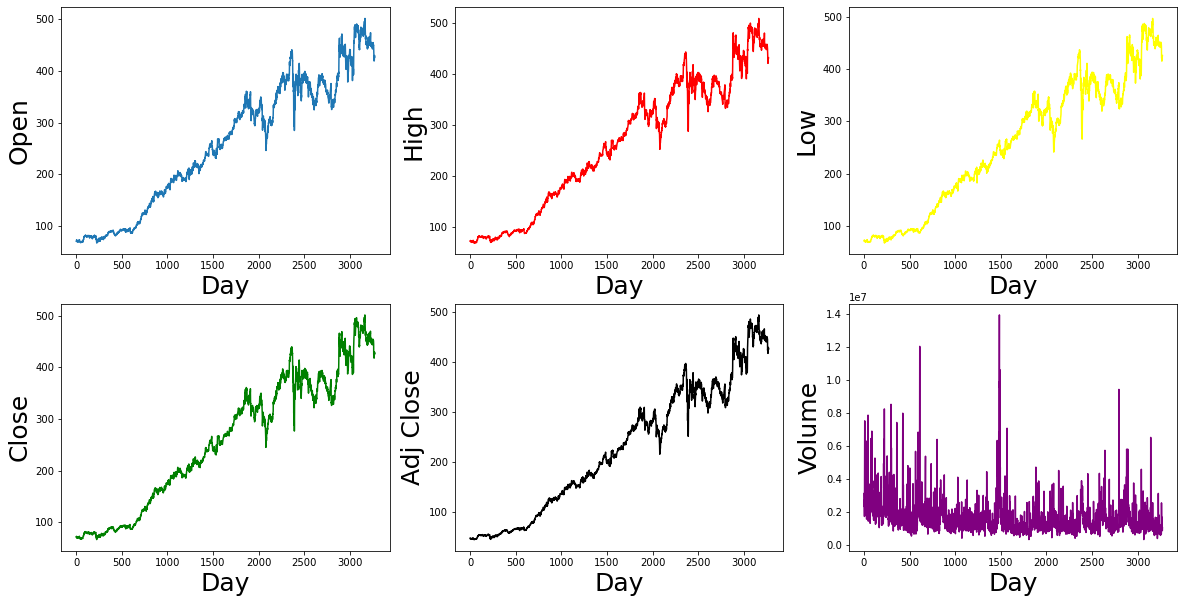

In [270]:
# Historical Stock Performance for Lockheed Martin from 21-09-2010 to 21-09-2021
fig, ((Axis1, Axis2, Axis3), (Axis4, Axis5, Axis6)) = plt.subplots(2, 3, figsize=(20, 10))
Axis1.plot(LMT_Stock_Data['Open'])
Axis1.set_xlabel("Day", fontsize = 25)
Axis1.set_ylabel("Open", fontsize = 25)
Axis2.plot(LMT_Stock_Data['High'], color = 'red')
Axis2.set_xlabel("Day", fontsize = 25)
Axis2.set_ylabel("High", fontsize = 25)
Axis3.plot(LMT_Stock_Data['Low'], color = 'yellow')
Axis3.set_xlabel("Day", fontsize = 25)
Axis3.set_ylabel("Low", fontsize = 25)
Axis4.plot(LMT_Stock_Data['Close'], color = 'green')
Axis4.set_xlabel("Day", fontsize = 25)
Axis4.set_ylabel("Close", fontsize = 25)
Axis5.plot(LMT_Stock_Data['Adj Close'], color = 'black')
Axis5.set_xlabel("Day", fontsize = 25)
Axis5.set_ylabel("Adj Close", fontsize = 25)
Axis6.plot(LMT_Stock_Data['Volume'], color = 'purple')
Axis6.set_xlabel("Day", fontsize = 25)
Axis6.set_ylabel("Volume", fontsize = 25)
plt.show()

In [271]:
#Preprocessing the data for achiving Scaling of the features
print(LMT_Stock_Data.columns)
print(LMT_Stock_Data.shape)
std = StandardScaler()
LMT_Stock_Data.drop(['Date'
],axis = 1, inplace = True)
Preprocessed_Data = std.fit_transform(LMT_Stock_Data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(3272, 7)


In [272]:
# VIEWING THE FIRST FEW ROWS OF THE PROCESSED DATA AS A DATAFRAME
Data_ML = pd.DataFrame(Preprocessed_Data)
Data_ML.head()

,0,1,2,3,4,5
0,-1.492010,-1.483333,-1.489920,-1.484229,-1.402242,1.409628
1,-1.485911,-1.481451,-1.484320,-1.483041,-1.401469,1.006867
2,-1.485594,-1.482549,-1.484400,-1.484071,-1.402139,0.670590
3,-1.483060,-1.474469,-1.483520,-1.472502,-1.394618,1.026615
4,-1.470941,-1.472430,-1.475119,-1.478445,-1.398482,0.695416


In [273]:
# DROPPING THE PREDICTED VARIABLE (['CLOSE']) FROM THE DATASET AND PRINTING THE FIRST FEW ROWS
Y = Data_ML[3]
X = Data_ML.drop([3], axis=1)
print(X.head())
print(Y.head())

          0         1         2         4         5
0 -1.492010 -1.483333 -1.489920 -1.402242  1.409628
1 -1.485911 -1.481451 -1.484320 -1.401469  1.006867
2 -1.485594 -1.482549 -1.484400 -1.402139  0.670590
3 -1.483060 -1.474469 -1.483520 -1.394618  1.026615
4 -1.470941 -1.472430 -1.475119 -1.398482  0.695416
0   -1.484229
1   -1.483041
2   -1.484071
3   -1.472502
4   -1.478445
Name: 3, dtype: float64


## TRAINING THE DATASET FOR THE MODELS USED IN THE ANALYSIS

In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)
ms = []
ma = []
mse = mean_squared_error
mae = mean_absolute_error

In [275]:
def model_training_and_score(model):
    model.fit(X_train, Y_train)
    Y_pred = np.nan_to_num(model.predict(X_test))
    print(mse(Y_test, Y_pred))
    print(mae(Y_test, Y_pred))
    ms.append(mse(Y_test, Y_pred))
    ma.append(mae(Y_test, Y_pred))

# RANDOM FOREST REGRESSION

In [276]:
model = RandomForestRegressor(n_estimators = 5, random_state = 12)
model_training_and_score(model)

0.0002885542219922118
0.009665270866296963


## In this case, the MSE score is 0.0002885542219922118 and the MAE score is 0.009665270866296963, indicating that, on average, the absolute difference between the model's predictions and the actual values is small. This suggests that the model's predictions are relatively close to the actual values in magnitude. But there might also be a chance of overfitting which is analyzed in the next steps.

## Checking for Overfitting

In [277]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [278]:
train_sizes = np.linspace(0.1, 1.0, 10, endpoint = True)  

In [279]:
train_errors = []
valid_errors = []

In [280]:
for train_size in train_sizes:
    # Determining the number of training examples based on the fraction of the dataset
    num_train_examples = int(train_size * len(X_train))
    
    # Subseting the training data
    X_train_subset = X_train[:num_train_examples]
    y_train_subset = y_train[:num_train_examples]
    
    # Creating and training the Random Forest model
    model = RandomForestRegressor(n_estimators = 5, random_state = 10)  # Adjusting hyperparameters as needed
    model.fit(X_train_subset, y_train_subset)
    
    # Calculating training and validation errors
    y_train_pred = model.predict(X_train_subset)
    y_valid_pred = model.predict(X_valid)
    
    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    valid_errors.append(mean_absolute_error(y_valid, y_valid_pred))

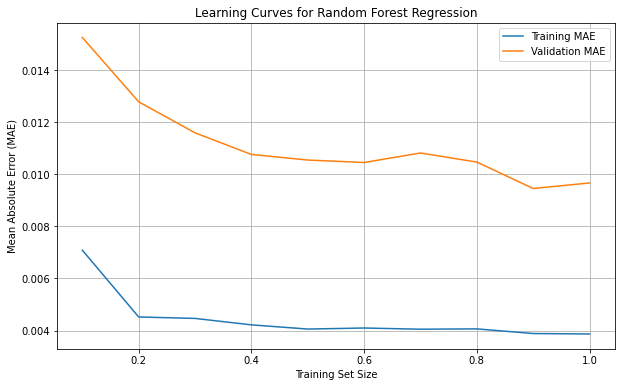

In [281]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label = 'Training MAE')
plt.plot(train_sizes, valid_errors, label = 'Validation MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curves for Random Forest Regression')
plt.legend()
plt.grid()
plt.show()

## As the Training Error is Getting Flat-lined but the Validation Error is increasing, we can suggest that there are subdued chances of Overfitting. But we have to also understand the feature most affecting the model which is further analyzed in the following steps.

## Understanding Feature Importances for the Model

In [282]:
feature_importances = model.feature_importances_
feature_names = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

In [283]:
# Printing the sorted feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"Feature: {feature}, Coefficient Value: {importance:.4f}")

Feature: High, Coefficient Value: 0.4526
Feature: Low, Coefficient Value: 0.4355
Feature: Open, Coefficient Value: 0.0599
Feature: Adj Close, Coefficient Value: 0.0518
Feature: Volume, Coefficient Value: 0.0009


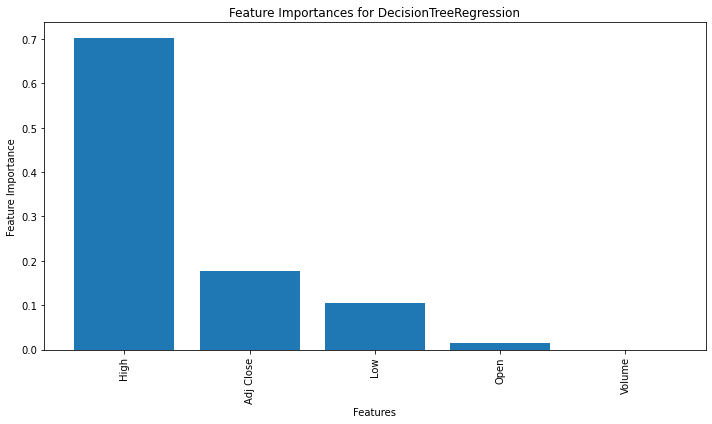

In [284]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label = sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for DecisionTreeRegression')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## We can easily verify from the bar graph that the 'high' column of the dataset has most Importance for this model.

## CHECKING FOR R SQUARE(R2)

In [285]:
Y_pred = model.predict(X)
Y_true = np.array(Data_ML[3])
r2 = r2_score(Y_true, Y_pred)
print(r2)

0.9998951595820317


## In this case, the R2 score is approximately 0.9999, which is very close to 1. This indicates that the regression model is doing an excellent job of explaining the variance in the data, and it provides a near-perfect fit to the true target values. It's a strong indicator that the model's predictions closely match the actual data.

# LASSO REGRESSION

In [286]:
model = Lasso(alpha=0.05, max_iter=1000000)
model_training_and_score(model)

0.002765930031091539
0.04459682333316741


## In this case both MSE and MAE are very low suggesting the model can predict the stock prices with very good accuracy as can be infered from very low errors. But this might also mean a case of overfitting which has to be further analyzed.

## CHECKING FOR OVERFITTING

In [287]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [288]:
# Adjusting the number of points as needed
train_sizes = np.linspace(0.2, 2.0, 20, endpoint = True)  # Adjusting the number of points as needed

In [289]:
train_errors = []
valid_errors = []

In [290]:
for train_size in train_sizes:
    # Determining the number of training examples based on the fraction of the dataset
    num_train_examples = int(train_size * len(X_train))
    
    # Subseting the training data
    X_train_subset = X_train[:num_train_examples]
    y_train_subset = y_train[:num_train_examples]
    
    # Creating and training the Lasso Regression model
    model = Lasso(alpha=0.05, max_iter = 1000000)  # Adjusting hyperparameters as needed
    model.fit(X_train_subset, y_train_subset)
    
    # Calculating training and validation errors
    y_train_pred = model.predict(X_train_subset)
    y_valid_pred = model.predict(X_valid)
    
    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    valid_errors.append(mean_absolute_error(y_valid, y_valid_pred))

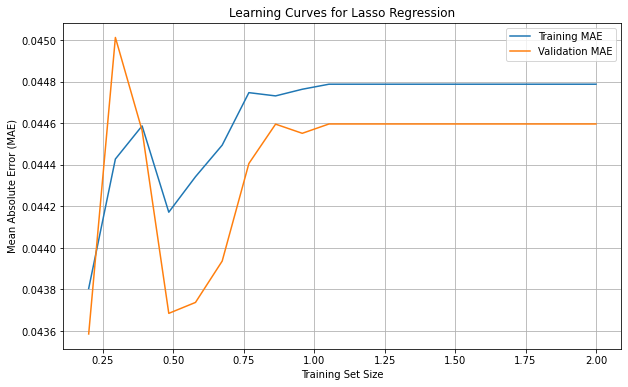

In [291]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training MAE')
plt.plot(train_sizes, valid_errors, label='Validation MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curves for Lasso Regression')
plt.legend()
plt.grid()
plt.show()

## As we can infer from the graph, the learning curves for both Training MAE and Validation MAE are getiing flat-lined and parallel therefore, the chances of overfitting are negligible.

## Understanding the feature Importances of the Model

In [292]:
# Create and fit a Lasso regression model with your chosen alpha value
lasso_model = Lasso(alpha=0.05, max_iter=1000000)
lasso_model.fit(Data_ML[[0, 1, 2, 4, 5]], Data_ML[3])  # Added closing parenthesis

# Get the coefficient values for each feature
coefficients = lasso_model.coef_

# Calculate the absolute magnitude of the coefficients
abs_coefficients = np.abs(coefficients)

# Create a dictionary to map feature names to their absolute coefficients
feature_importance = dict(zip(feature_names, abs_coefficients))

# Sort the feature importance dictionary by absolute coefficient values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Print or visualize the sorted feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"Feature: {feature}, Coefficient Magnitude: {importance:.4f}")


Feature: High, Coefficient Magnitude: 0.5741
Feature: Low, Coefficient Magnitude: 0.3759
Feature: Open, Coefficient Magnitude: 0.0000
Feature: Adj Close, Coefficient Magnitude: 0.0000
Feature: Volume, Coefficient Magnitude: 0.0000


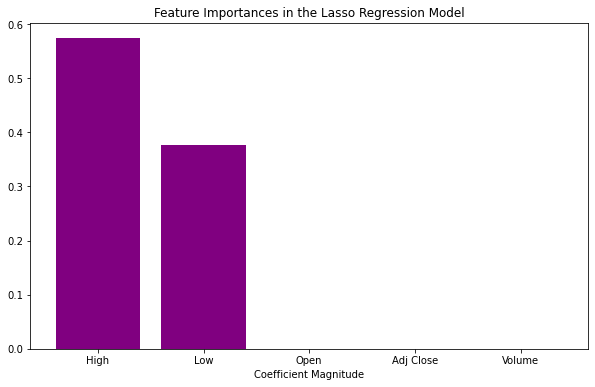

In [293]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(features, coeff_magnitudes, color='purple')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importances in the Lasso Regression Model')
plt.show()

## From the Graph above we can easily infer that the column 'high' has the highest importance.

## CHECKING FOR R2

In [294]:
Y_pred = model.predict(X)
Y_true = np.array(Data_ML[3])
r2 = r2_score(Y_true, Y_pred)
print(r2)

0.9972749732646111


## In this case, the R2 score is approximately 0.9973, which is very close to 1. This indicates that this regression model is doing an excellent job of explaining the variance in the data, and it provides a strong fit to the true target values. It suggests that the model's predictions closely match the actual data.

# SUPPORT VECTOR REGRESSION

In [295]:
model = SVR()
model_training_and_score(model)

0.0018378214007178965
0.03462134727043743


## In this case both the MSE and MAE are relatively low suggesting good performance for the model but further analysis is needed to check if the model is case for overfitting which is carried out in the following steps.

# Checking for Overfitting

In [296]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [297]:
# Adjusting the number of points as needed
train_sizes = np.linspace(0.5, 5.0, 50, endpoint = True)

In [298]:
train_errors = []
valid_errors = []

In [299]:
for train_size in train_sizes:
    # Determining the number of training examples based on the fraction of the dataset
    num_train_examples = int(train_size * len(X_train))
    
    # Subseting the training data
    X_train_subset = X_train[:num_train_examples]
    y_train_subset = y_train[:num_train_examples]
    
    # Creating and training the SVR model
    model = SVR()  # You can adjust hyperparameters as needed
    model.fit(X_train_subset, y_train_subset)
    
    # Calculating training and validation errors
    y_train_pred = model.predict(X_train_subset)
    y_valid_pred = model.predict(X_valid)
    
    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    valid_errors.append(mean_absolute_error(y_valid, y_valid_pred))

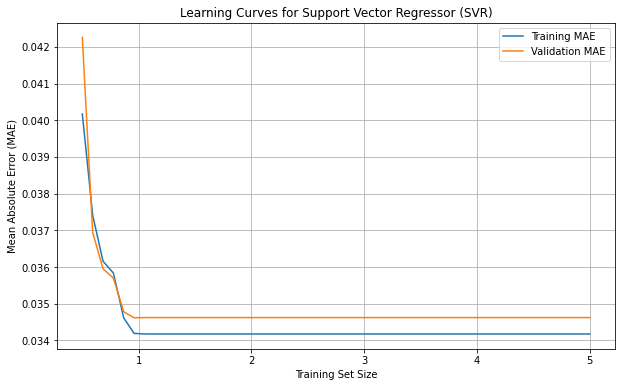

In [300]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training MAE')
plt.plot(train_sizes, valid_errors, label='Validation MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curves for Support Vector Regressor (SVR)')
plt.legend()
plt.grid()
plt.show()

## By looking at the graph we can infer that the curves for Training MAE and Validation MAE are getting flat lined and parallel to each other which suggests no signs of Overfitting.

## Understanding the feature importances for the model

Feature: High, Coefficient Value: 0.5741
Feature: Low, Coefficient Value: 0.3759
Feature: Open, Coefficient Value: 0.0000
Feature: Adj Close, Coefficient Value: 0.0000
Feature: Volume, Coefficient Value: 0.0000


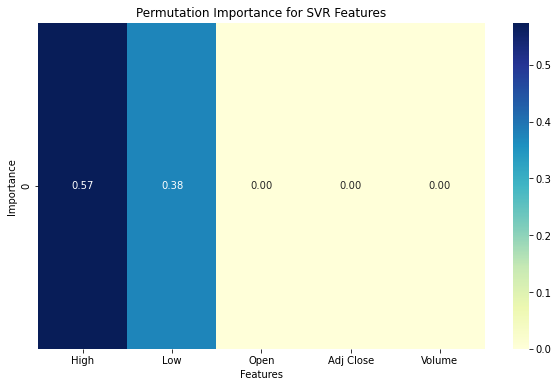

In [301]:
# Fitting the SVR model to your data
svr_model = SVR(kernel='rbf')
svr_model.fit(Data_ML[[0,1,2,4,5]], Data_ML[3])

# Calculating permutation importance
perm_importance = permutation_importance(svr_model, Data_ML[[0,1,2,4,5]], Data_ML[3], n_repeats=30, random_state=0)

# Getting the sorted feature importances
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Printing the sorted feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"Feature: {feature}, Coefficient Value: {importance:.4f}")

# Creating a heat map to visualize feature importance
feature_names = np.array(list(sorted_feature_importance.keys()))
importances = np.array(list(sorted_feature_importance.values()))
plt.figure(figsize=(10, 6))
sns.heatmap(np.array(importances).reshape(1, -1), annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=feature_names)
plt.title('Permutation Importance for SVR Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## From the heat-map we can clearly indicate that the 'high' column has the highest importance in the model.

## CHECKING FOR R2

In [302]:
Y_pred = model.predict(X)
Y_true = np.array(Data_ML[3])
r2 = r2_score(Y_true, Y_pred)
print(r2)

0.9981695454377092


## In this case, r2 is close to 0.99 which is very close to 1. This indicates that this regression model is doing an excellent job of explaining the variance in the data, and it provides a strong fit to the true target values. It suggests that the model's predictions closely match the actual data.

# STOCHASTIC GRADIENT DESCENT REGRESSION 

In [303]:
model = SGDRegressor()
model_training_and_score(model)

0.0006439585137054828
0.02009992221676158


## In this case we can verify that the MSE and MAE are resonably low and the model does a fair job in prediction. But further analysis will reveal more variance and a case of overfitting if it exists which is carried out in the following steps.

## Checking for Overfitting

In [304]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [305]:
# Adjusting the number of points
train_sizes = np.linspace(0.1, 1.0, 10, endpoint = True)

In [306]:
train_errors = []
valid_errors = []

In [307]:
for train_size in train_sizes:
    # Determining the number of training examples based on the fraction of the dataset
    num_train_examples = int(train_size * len(X_train))
    
    # Subseting the training data
    X_train_subset = X_train[:num_train_examples]
    y_train_subset = y_train[:num_train_examples]
    
    # Creating and training the SGD Regressor model
    model = SGDRegressor()  # You can adjust hyperparameters as needed
    model.fit(X_train_subset, y_train_subset)
    
    # Calculating training and validation errors
    y_train_pred = model.predict(X_train_subset)
    y_valid_pred = model.predict(X_valid)
    
    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    valid_errors.append(mean_absolute_error(y_valid, y_valid_pred))

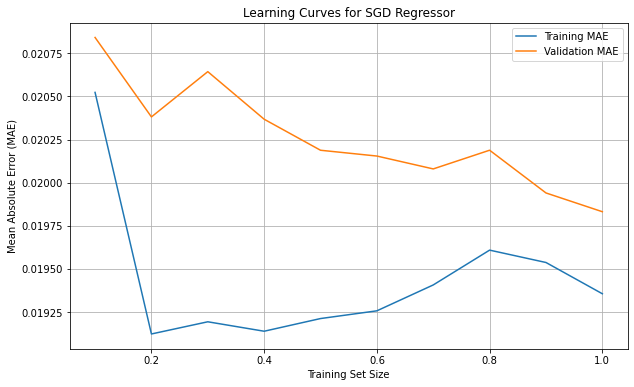

In [308]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training MAE')
plt.plot(train_sizes, valid_errors, label='Validation MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curves for SGD Regressor')
plt.legend()
plt.grid()
plt.show()

## From the graph we can infer that the training error and validation error are getting parallel negating any chances of Overfitting.

## Understanding the Feature Importances

Feature: High, Coefficient Value: 0.2601
Feature: Low, Coefficient Value: 0.2592
Feature: Open, Coefficient Value: 0.2564
Feature: Adj Close, Coefficient Value: 0.2240
Feature: Volume, Coefficient Value: -0.0027


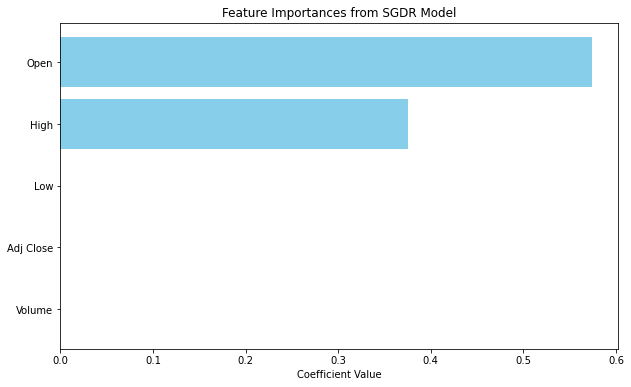

In [310]:
# Creating and fit the SGDR model
sgdr_model = SGDRegressor()
sgdr_model.fit(Data_ML[[0, 1, 2, 4, 5]], Data_ML[3])  

# Getting the coefficient values for each feature
coefficients = sgdr_model.coef_
feature_names = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  

# Creating a dictionary to map feature names to their coefficients
feature_importance = dict(zip(feature_names, coefficients))

# Sorting the feature importance dictionary by coefficient values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"Feature: {feature}, Coefficient Value: {importance:.4f}")

#Plotting the Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importances from SGDR Model')
plt.gca().invert_yaxis()
plt.show()

## CHECKING FOR R2

In [311]:
Y_pred = model.predict(X)
Y_true = np.array(Data_ML[3])
r2 = r2_score(Y_true, Y_pred)
print(r2)

0.999413474338469


## In this case, r2 is very close to 1 and from the graph we can infer that there is no signs of Overfitting suggesting this model to be a good fit.

# DECISION TREE REGRESSION

In [312]:
model = DecisionTreeRegressor()
model_training_and_score(model)

0.00035266126376149533
0.011322165220388163


## In this case, the MSE value is very low, which suggests that the model's predictions are close to the actual values, indicating good model performance in terms of minimizing squared errors. The MAE value in this case is relatively low, indicating that the model's predictions are close to the actual values in an absolute sense.

In [313]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [314]:
max_depths = [None, 5, 10, 15, 20]  # Adjusting the depths

train_errors = []
valid_errors = []

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state = 0)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    train_errors.append(mean_absolute_error(y_train, y_train_pred))
    valid_errors.append(mean_absolute_error(y_valid, y_valid_pred))

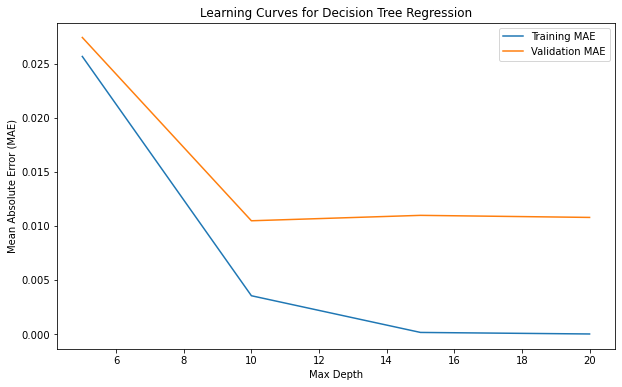

In [315]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Training MAE')
plt.plot(max_depths, valid_errors, label='Validation MAE')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curves for Decision Tree Regression')
plt.legend()
plt.show()

## As we can infer from the graph that the Training error and Validation error lines are getting parallel, we can suggest that the chances of Overfitting is negligible. But since it is a classification model, we can't be so sure from the Learning curve graph alone and we also have to understand the feature importances which is carried out in the following steps.

## Feature Importances

In [316]:
feature_importances = model.feature_importances_

In [317]:
feature_names = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

In [318]:
# Printing the sorted feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"Feature: {feature}, Coefficient Value: {importance:.4f}")

Feature: High, Coefficient Value: 0.2601
Feature: Low, Coefficient Value: 0.2592
Feature: Open, Coefficient Value: 0.2564
Feature: Adj Close, Coefficient Value: 0.2240
Feature: Volume, Coefficient Value: -0.0027


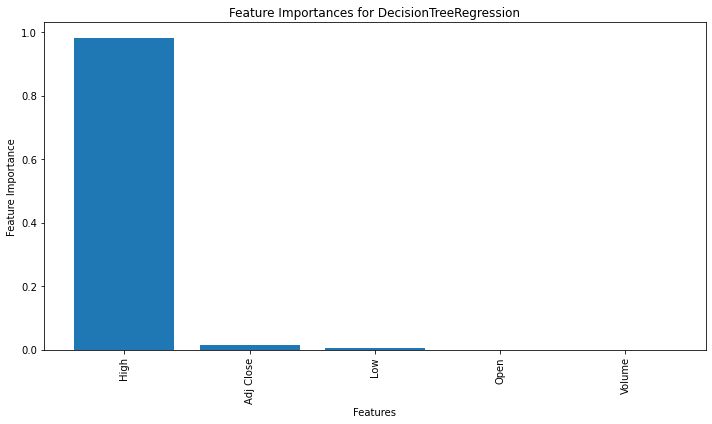

In [319]:
# Plotting the Faeture Importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label = sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for DecisionTreeRegression')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## From the graph above we can infer that the 'high' column has most importance in this model.

## CHECKING FOR R2

In [320]:
Y_pred = model.predict(X)
Y_true = np.array(Data_ML[3])
r2 = r2_score(Y_true, Y_pred)
print(r2)

0.9999391258836293


## In this case, the R2 score is very close to 1, specifically 0.9999391258836293. This indicates that the model is an excellent fit for the data, as it explains almost all of the variability in the target variable. It suggests that the model's predictions are very close to the true values, and the features used in the model are highly effective in explaining the variation in the target variable.

# RIDGE REGRESSION

In [321]:
model = Ridge(alpha = 1)
model_training_and_score(model)

1.0203044678108921
0.8846449528177954


## An MSE of approximately 1.0203 suggests that, on average, the squared differences between the model's predictions and the actual values are relatively small. This indicates that the model's predictions are relatively close to the true values, with small errors. An MAE of approximately 0.8846 suggests that, on average, the absolute differences between the model's predictions and the actual values are relatively small. This indicates that the model's predictions have smaller absolute errors, and the model is providing reasonably accurate predictions for the given dataset.

## Checking for Overfitting

In [322]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [323]:
# Adjusting the number of points
train_sizes = np.linspace(0.5, 5.0, 50, endpoint = True)

In [324]:
train_errors = []
valid_errors = []

In [325]:
for train_size in train_sizes:
    # Determining the number of training examples based on the fraction of the dataset
    num_train_examples = int(train_size * len(X_train))
    
    # Subseting the training data
    X_train_subset = X_train[:num_train_examples]
    y_train_subset = y_train[:num_train_examples]
    
    # Creating and training the SGD Regressor model
    model = Ridge(alpha = 1)
    model.fit(X_train_subset, y_train_subset)
    
    # Calculating training and validation errors
    y_train_pred = model.predict(X_train_subset)
    y_valid_pred = model.predict(X_valid)
    
    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred))
    valid_errors.append(mean_absolute_error(y_valid, y_valid_pred))

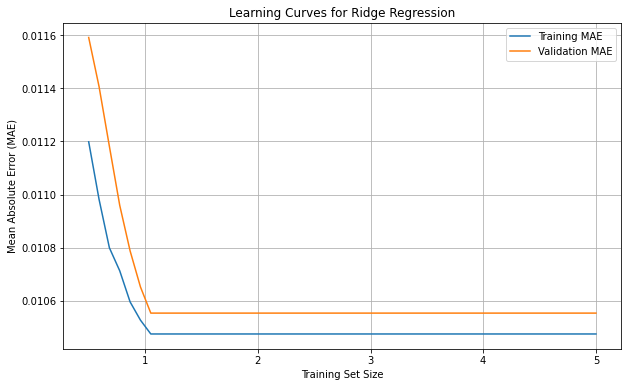

In [326]:
# Plotting the Errors
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training MAE')
plt.plot(train_sizes, valid_errors, label='Validation MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curves for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

## We can clearly verify from the above graph that there is no overfitting in the prediction model but we have to check for the feature importances affecting the model the most.

## Understanding Feature Importances

In [327]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)  # X_train is your feature matrix, y_train is your target variable

# Getting the coefficient values for each feature
coefficients = ridge_model.coef_

# Calculating the absolute magnitude of the coefficients
abs_coefficients = abs(coefficients)

# Creating a dictionary to map feature names to their absolute coefficients
feature_importance = dict(zip(feature_names, abs_coefficients))

# Sorting the feature importance dictionary by absolute coefficient values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"Feature: {feature}, Coefficient Magnitude: {importance:.4f}")

Feature: High, Coefficient Magnitude: 0.4526
Feature: Low, Coefficient Magnitude: 0.4355
Feature: Open, Coefficient Magnitude: 0.0599
Feature: Adj Close, Coefficient Magnitude: 0.0518
Feature: Volume, Coefficient Magnitude: 0.0009


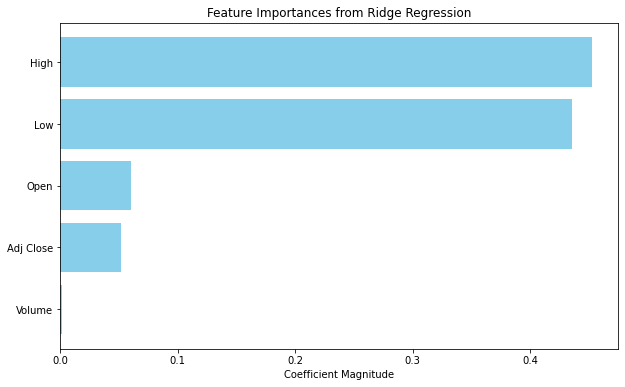

In [328]:
feature_names = list(sorted_feature_importance.keys())
importances = list(sorted_feature_importance.values())

# Creating a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importances from Ridge Regression')
plt.gca().invert_yaxis()
plt.show()

## From the above graph we can verify that 'high' feature has the most importance closely followed by the 'Low' feature for this model.

## Checking for R2

In [329]:
Y_pred = model.predict(X)
Y_true = np.array(Data_ML[3])
r2 = r2_score(Y_true, Y_pred)
print(r2)

0.99974609893782


## In this case R2 is pretty close to 1. This indicates that the model is an excellent fit for the data, as it explains almost all of the variability in the target variable. It suggests that the model's predictions are very close to the true values, and the features used in the model are highly effective in explaining the variation in the target variable.

## After investigating several models to predict the stock prices of Lockheed Martin we have to now investigate the 'Losses' for each model in our prediction by visualizing and plotting them. This will give us a fair idea about which model best suits our prediction model.

## Plotting the Lossses:

In [334]:
models = ["Random Forest", "Lasso", "Support Vector", "Stochastic Gradient", "Decision Tree", "Ridge Regression"]
mse_values = [0.0002885542219922118, 0.002765930031091539, 0.0018378214007178965, 0.0006414629561160383, 0.00037650609248185874, 1.0203044678108921]  
mae_values = [0.009665270866296963, 0.04459682333316741, 0.03462134727043743, 0.019825326543296842,  0.011505199279474363, 0.8846449528177954]  
r2_values = [0.9998951595820317, 0.9972749732646111, 0.9981695454377092, 0.9994167047752017, 0.9999391258836293, 0.99974609893782]  

In [344]:
def plot_performance(models, mse_values, mae_values, r2_values):
    barwidth = 0.2
    fig, ax = plt.subplots(figsize=(18, 6))

    br1 = np.arange(len(models))
    br2 = [x + barwidth for x in br1]
    br3 = [x + barwidth for x in br2]

    plt.bar(br1, mse_values, color='red', width=barwidth, label='Mean Squared Error')
    plt.bar(br2, mae_values, color='blue', width=barwidth, label='Mean Absolute Error')
    plt.bar(br3, r2_values, color='green', width=barwidth, label='R-squared (R2)')

    plt.xlabel("Models", fontsize=15)
    plt.ylabel("Loss / R2", fontsize=15)

    plt.xticks([r + barwidth for r in range(len(models))], models)
    plt.legend()
    plt.show()

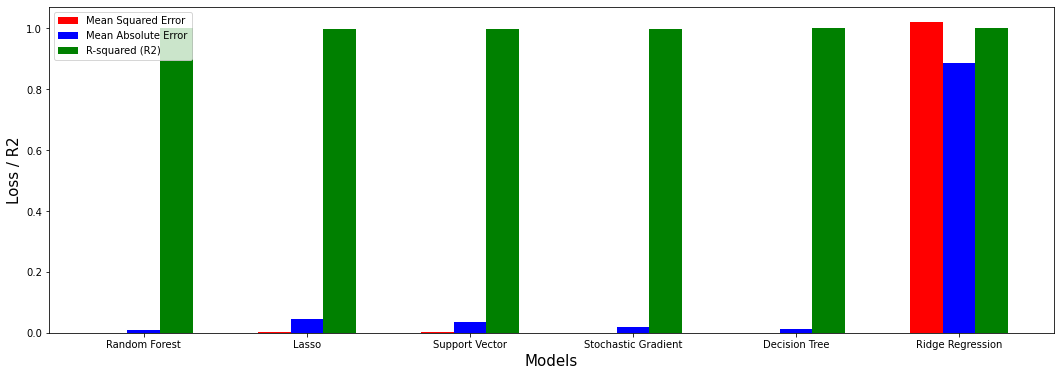

In [345]:
# Call the function to create the grouped bar chart
plot_performance(models, mse_values, mae_values, r2_values)

# CONCLUSION: 
## From our analysis to predict the stock prices of Lockheed Martin from the historical dataset, we observed the performance of six machine learning models. We found that each model tested was quiet easily able to predict the stock prices with a high degree of accuracy. Suspecting for Overfitting, we also put each model through the crucible of test for overfitting and found out that all models had negligible to zero chances of overfitting.
## To further substantiate our claims we also checked for the individual effect of each feature that was impacting the model and found that feature 'High' was largely influential in every model and feature 'Close' was impacting only 2 models and feature 'Open' was impacting in only 1 model. 
## In our analysis we also calculated for R squared which explained the varaibility in the predicted variable and the model's overall performance. We found that R squraed was quiet high in every model tested. 
## Finally, we plotted the differences in each model to provide us with a visual on the performance of each model which can be infered from the above graph.